<a href="https://colab.research.google.com/github/code1ayush/spam_Detector/blob/main/Spam_Detector_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import datetime
print(datetime.datetime.now())

2024-01-30 10:45:15.560252


In [ ]:
!nvidia-smi -L

GPU 0: Tesla T4 (UUID: GPU-3de20c73-1fea-1875-1447-9f52c15ea6c3)


In [ ]:
# get helper functions
!wget https://raw.githubusercontent.com/code1ayush/DeepLearning_helper_functions/main/All_in_one_function.py

from All_in_one_function import plot_loss_curves,unzip_data,compare_historys

--2024-01-30 10:45:53--  https://raw.githubusercontent.com/code1ayush/DeepLearning_helper_functions/main/All_in_one_function.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10245 (10K) [text/plain]
Saving to: ‘All_in_one_function.py’

All_in_one_function 100%[===================>]  10.00K  --.-KB/s    in 0s      

2024-01-30 10:45:54 (107 MB/s) - ‘All_in_one_function.py’ saved [10245/10245]



Let's download a text dataset for the disaster or not disaster

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip

--2024-01-30 10:46:07--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.69.207, 64.233.181.207, 64.233.182.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.69.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.006s  

2024-01-30 10:46:07 (103 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



In [ ]:
# Let's unzip the above data
unzip_data("nlp_getting_started.zip")

# It's time for us to visualize our Dataset

In [ ]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [ ]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [ ]:
# It will be better if we shuffle the training dataset
train_df_shuffled = train_df.sample(frac=1,random_state=42)
train_df_shuffled.head()

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0


In [ ]:
# Now let's count how many sample of each type of data is in training set
train_df_shuffled.location.value_counts()

USA                               104
New York                           71
United States                      50
London                             45
Canada                             29
                                 ... 
Im In Route                         1
LiÌ¬ge                              1
Purgatory, USA                      1
Newcastle, England                  1
Stamford & Cork (& Shropshire)      1
Name: location, Length: 3341, dtype: int64

In [ ]:
len(train_df_shuffled)

7613

In [ ]:
train_df_shuffled["text"][0]

'Our Deeds are the Reason of this #earthquake May ALLAH Forgive us all'

In [ ]:
# Let's visualize some random training samples
import random
random_index = random.randint(0,len(train_df)-5) # create a random index not higher than total number of samples
for row in train_df_shuffled[["text","target"]][random_index:random_index+5].itertuples():
  _,text,target=row
  print(f"{text,target}\n")

('@JoeDawg42 TOR for a TOR situation only. Wind damage enhanced wording is key IMO', 1)

('@followlasg This is urgentthere is currently a 3 storey building at church B/stop Oworoshoki Third mainland bridge which likely to collapse', 1)

('Vampiro going through the table of flames #UltimaLucha #LuchaUnderground @Elreynetwork http://t.co/Ox6OUw3Yut', 0)

('Twister was fun https://t.co/qCT6fb8wOn', 0)

('NWS has issued a Severe Thunderstorm Warning for Oklahoma-OK until 10:30 PM', 1)



# Splitting data in training and test sets


In [ ]:
from sklearn.model_selection import train_test_split

train_sentences,val_sentences,train_labels,val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                         train_df_shuffled["target"].to_numpy(),
                                                                         test_size=0.1,
                                                                         random_state=42)

In [ ]:
len(train_sentences),len(val_sentences),len(train_labels),len(val_labels)

(6851, 762, 6851, 762)

In [ ]:
one = len(train_labels)+len(val_labels)

In [ ]:
two = len(train_df_shuffled)

In [ ]:
one==two

True

In [ ]:
train_sentences[:10],train_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array([0,

# Converting text in to number

In [ ]:
# let's convert the text in to numbers
# we will be using tensorflow's textVectorization
# A preprocessing layer which maps text features to integer sequences.
import tensorflow as tf
from tensorflow.keras.layers import TextVectorization
text_vectorizer = TextVectorization(max_tokens=None, # how many words in your vocabulary
                                    standardize="lower_and_strip_punctuation",# remvoe all punctuations and lower the capital letters
                                    split="whitespace",# splits the sentences on white spaces
                                    ngrams=None, # create group of n words
                                    output_mode="int", #how to map token to number could be int float or anything but generally int
                                    output_sequence_length=None # how long should be output sequence of the token should be
                                    )
# these are all the default parameters

* We will generally change the default values for the max tokens to 10000 cause we don't want it to be so long and it will take most occured 10000 words
* And second we will change the output_sequence_length and we will be taking it as average of length of all tokens


In [ ]:
# Let's find average of length of all tokens over sentences
round(sum([len(i.split()) for i in train_sentences])/len(train_sentences))

15

So we will set our output_sequence length will be 15,All the tokens(words) after 15 will be cutoff and if some sentence is smaller than that of 15 tokens it will pad with all zeros

In [ ]:
# Now rewrite the vectorization layer
max_vocab_length = 10000 # max number of words to have in our vocabulary
max_length = 15 # max length our sequences will be (e.g. how many words from a Tweet does our model see?)
text_vectorizer = TextVectorization(max_tokens=max_vocab_length,
                                    output_mode="int",
                                    output_sequence_length=max_length)

In [ ]:
# Fit the text vectorizer to the training text
text_vectorizer.adapt(train_sentences)

In [ ]:
# let's see on custom sample of text
custom_sample = "Hello my name is ayush kumar"
vectorized_sample = text_vectorizer([custom_sample])
vectorized_sample

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[1400,   13,  735,    9,    1,    1,    0,    0,    0,    0,    0,
           0,    0,    0,    0]])>

In [ ]:
# Let's see it on the random samples on train data
import random
random_sentence = random.choice(train_sentences)
print(f"Before vectorization: \n {random_sentence}")
print(f"After vectorization: \n {text_vectorizer(random_sentence)}")

Before vectorization: 
 Lightning strike in the distance via /r/pics http://t.co/iDmhSwewQw #pics
After vectorization: 
 [ 300 1251    4    2 2139   49 4709 5443 1619    0    0    0    0    0
    0]


Looking good!

Finally, we can check the unique tokens in our vocabulary using the get_vocabulary() method.

In [ ]:
word_in_vacob = text_vectorizer.get_vocabulary()
top_5_words = word_in_vacob[:5]
bottom_5_words = word_in_vacob[-5:]
print(f"there are total {len(word_in_vacob)} number of words or tokens")
print(f"top 5 words are : {top_5_words}")
print(f"bottom 5 words are : {bottom_5_words}")

there are total 10000 number of words or tokens
top 5 words are : ['', '[UNK]', 'the', 'a', 'in']
bottom 5 words are : ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


Here [UNK] denotes the unknown tokens means these are the unrecognised tokens

# Now creating an embedding using embedding layer
1. Here we converted our texted in number means we maped our text to some whole number using text vectorization method but we still need it convert it in to some sort of vectors that we will do with the help of embedding
2. We can see what an embedding of a word looks like by using the tf.keras.layers.Embedding layer.
3. The main parameters we're concerned about here are:

* input_dim - The size of the vocabulary (e.g. len(text_vectorizer.get_vocabulary()).
* output_dim - The size of the output embedding vector, for example, a value of 100 outputs a feature vector of size 100 for each word.
* embeddings_initializer - How to initialize the embeddings matrix, default is "uniform" which randomly initalizes embedding matrix with uniform distribution. This can be changed for using pre-learned embeddings.
* input_length - Length of sequences being passed to embedding layer.

In [ ]:
tf.random.set_seed(42)
from tensorflow.keras import layers

embedding = layers.Embedding(input_dim=len(word_in_vacob), # set the input shape it will be total number of different words are token in the train data
                             output_dim = 128,  # it can vary you can set it according to you it will show you how a you can store a token in to a vector of size you like here you will get a vector of size 128 for one word
                             embeddings_initializer="uniform",# initial values will be random
                             input_length = max_length, # max length of the input sentences
                             name="embedding_layer" )

In [ ]:
embedding

In [ ]:
# Now our layer is created let's test it on custom samples
original_sample = "hello my name is ayush kumar"
vectorized_sample = text_vectorizer(original_sample)
embedding_sample = embedding(vectorized_sample)
print(f"original sample: {original_sample}")
print(f"vectorized sample: {vectorized_sample}")
print(f"embedded sample \n {embedding_sample}")

original sample: hello my name is ayush kumar
vectorized sample: [1400   13  735    9    1    1    0    0    0    0    0    0    0    0
    0]
embedded sample 
 [[ 0.02179097  0.04401393 -0.04120962 ... -0.01080205 -0.02368554
   0.02163   ]
 [ 0.01754129 -0.04519871  0.04108243 ... -0.01647568 -0.04032744
  -0.03181899]
 [ 0.03134755 -0.0436676  -0.00094085 ... -0.0001762  -0.04704523
   0.04945472]
 ...
 [-0.0418188  -0.00345426 -0.01859117 ...  0.00744318 -0.0351042
   0.02876094]
 [-0.0418188  -0.00345426 -0.01859117 ...  0.00744318 -0.0351042
   0.02876094]
 [-0.0418188  -0.00345426 -0.01859117 ...  0.00744318 -0.0351042
   0.02876094]]


In [ ]:
print(embedding_sample.shape)

(15, 128)


In [ ]:
embedding_sample[0]

<tf.Tensor: shape=(128,), dtype=float32, numpy=
array([ 2.17909701e-02,  4.40139286e-02, -4.12096158e-02, -1.77175403e-02,
        4.20315154e-02,  1.51897781e-02,  8.13024119e-03, -1.70363411e-02,
       -2.94546969e-02,  9.59317759e-03, -1.48535855e-02,  3.72022875e-02,
        3.37208435e-03,  6.91071898e-03,  4.58519198e-02, -5.79115003e-03,
       -4.87250946e-02, -7.39450380e-03, -3.17170843e-02, -8.43077898e-03,
       -3.77033465e-02,  2.31670178e-02,  4.47118916e-02,  4.09153588e-02,
        1.83691643e-02,  2.83554904e-02,  9.01713222e-03, -9.52632353e-03,
       -4.49950695e-02, -4.89306711e-02,  1.54922344e-02,  3.59583013e-02,
        4.75758351e-02,  3.68462242e-02, -2.11276412e-02,  3.08430903e-02,
       -3.69907022e-02, -1.10148191e-02, -4.02918346e-02,  9.98755544e-03,
       -4.14670594e-02, -3.13523188e-02, -2.15712674e-02,  4.10849564e-02,
        2.00314187e-02,  8.62466171e-03,  5.92030585e-04, -1.98024511e-02,
       -1.87051781e-02,  2.48568170e-02,  4.52337973

In [ ]:
# Now let's test it on random train data
random_index = random.randint(0,len(train_sentences))
original_sample = train_sentences[random_index]
vectorized_sample = text_vectorizer([original_sample])
embedded_sample = embedding(vectorized_sample)
print(f"original sample: {original_sample}")
print(f"vectorized sample: {vectorized_sample}")
print(f"embedded sample \n {embedded_sample}")
print(embedded_sample.shape)

original sample: He better than Sean bro. I can admit that Sean is flames now. But he better than Sean https://t.co/aomQ1RYKmJ
vectorized sample: [[  56  441   76 2714 1709    8   71 6262   16 2714    9  218   48   30
    56]]
embedded sample 
 [[[ 0.02711846 -0.0356657   0.01133875 ...  0.01059008  0.01092803
    0.03577442]
  [-0.02635202  0.0112285   0.04002006 ... -0.04864199 -0.02119018
    0.00544938]
  [ 0.01956401 -0.03260916  0.02594352 ...  0.01132107 -0.02379392
    0.04081661]
  ...
  [ 0.043371   -0.04490406 -0.00654669 ...  0.04182598  0.00366142
    0.02273783]
  [ 0.03564235 -0.00758829  0.00998025 ...  0.01056407  0.02797567
    0.00493039]
  [ 0.02711846 -0.0356657   0.01133875 ...  0.01059008  0.01092803
    0.03577442]]]
(1, 15, 128)


More specifically, we'll be building the following:

* Model 1: Feed-forward neural network (dense model)
* Model 0: Naive Bayes (baseline)
* Model 2: LSTM model
* Model 3: GRU model
* Model 4: Bidirectional-LSTM model
* Model 5: 1D Convolutional Neural Network
* Model 6: TensorFlow Hub Pretrained Feature Extractor
* Model 7: Same as model 6 with 10% of training data
* Model 0 is the simplest to acquire a baseline which we'll expect each other of the other deeper models to beat.

Each experiment will go through the following steps:

* Construct the model
* Train the model
* Make predictions with the model
* Track prediction evaluation metrics for later comparison
* Let's get started.

# model 0 getting a base line
To create a baseline we will use scikit learn pipeline using the TF-IDF(term frequency inverse document frequency) formula to convert our words in to numbers and then model them with the help of multinomial Navies base algorithm

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

# create tokenization and modelling pipleline
model_0 = Pipeline([("tfdif",TfidfVectorizer()),# converts words in to numbers using tfidfvectorizer
                    ("clf",MultinomialNB())])#model the text

# Fit the pipeline with the trainig data
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfdif', TfidfVectorizer()), ('clf', MultinomialNB())])

In [ ]:
baseline_score = model_0.score(val_sentences, val_labels)
print(f"Our baseline model achieves an accuracy of: {baseline_score*100:.2f}%")

Our baseline model achieves an accuracy of: 79.27%


In [ ]:
# Make predictions
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:25]==val_labels[:25]

array([False, False,  True, False, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False, False, False,  True])

In [ ]:
# Let's create a function to evaluate our models on different parameters
from sklearn.metrics import accuracy_score,precision_recall_fscore_support
def calculate_results(y_true,y_pred):
  """
  this function will take true values of a model and predicted values of a model and return
  accuracy,precision,recall,and F1_score of the model

  arg:
  y_true:true values
  y_pred:predicted values of the model

  return:
  returns a dictionary of accuracy,precision,recall and f1_score

  """
  accuracy = accuracy_score(y_true,y_pred)*100
  precision,recall,f1_score,_ = precision_recall_fscore_support(y_true,y_pred,average ="weighted")
  results = {
      "accuracy":accuracy,
      "precision":precision,
     " recall":recall,
      "f1_score":f1_score
  }
  return results

In [ ]:
baseline_results = calculate_results(val_labels,baseline_preds)
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 ' recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

# Model_1 A simple dense model
It'll take our text and labels as input, tokenize the text, create an embedding, find the average of the embedding (using Global Average Pooling) and then pass the average through a fully connected layer with one output unit and a sigmoid activation function.

In [ ]:
# Building model with functional api
import tensorflow as tf
inputs=tf.keras.layers.Input(shape=(1,),dtype="string",name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)
x = tf.keras.layers.GlobalAveragePooling1D(name="global_pooling_layer")(x)
outputs=tf.keras.layers.Dense(1,activation="sigmoid",name="output_layer")(x)

model_1 = tf.keras.Model(inputs,outputs)


In [ ]:
model_1.summary()

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_layer (Embedding  (None, 15, 128)           1280000   
 )                                                               
                                                                 
 global_pooling_layer (Glob  (None, 128)               0         
 alAveragePooling1D)                                             
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                           

In [ ]:
# Now let's compile our model
model_1.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics="accuracy")

In [ ]:
# Let's fit the model on training data
model_1_history = model_1.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels)
            )

Epoch 1/5
215/215 [==============================] - 9s 32ms/step - loss: 0.6082 - accuracy: 0.6965 - val_loss: 0.5355 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 2s 8ms/step - loss: 0.4407 - accuracy: 0.8192 - val_loss: 0.4693 - val_accuracy: 0.7887
Epoch 3/5
215/215 [==============================] - 2s 7ms/step - loss: 0.3460 - accuracy: 0.8606 - val_loss: 0.4592 - val_accuracy: 0.7900
Epoch 4/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2844 - accuracy: 0.8918 - val_loss: 0.4644 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 1s 6ms/step - loss: 0.2375 - accuracy: 0.9120 - val_loss: 0.4770 - val_accuracy: 0.7861


In [ ]:
loss,accuracy=model_1.evaluate(val_sentences,val_labels)
print(f"loss in the model is :{loss}")
print(f"accuracy of the model is :{accuracy*100:.2f}%")

24/24 [==============================] - 0s 3ms/step - loss: 0.4770 - accuracy: 0.7861
loss in the model is :0.4769880175590515
accuracy of the model is :78.61%


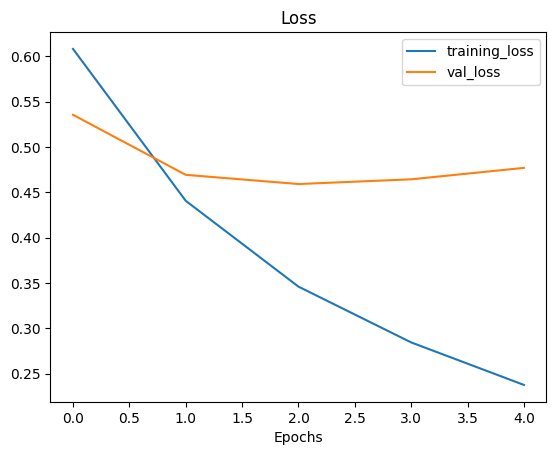

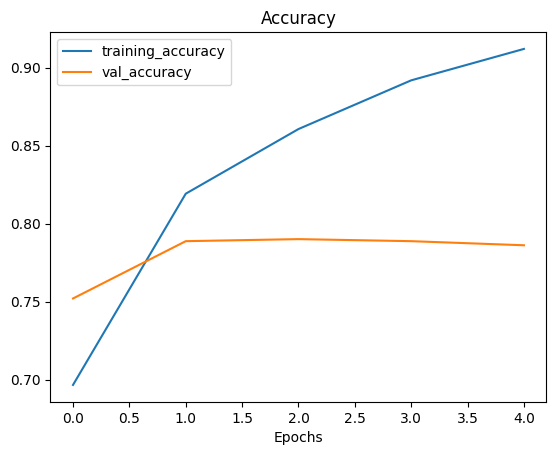

In [ ]:
plot_loss_curves(model_1_history)

In [ ]:
import math
model_1_preds = tf.round(model_1.predict(val_sentences))
model_1_preds = tf.squeeze(model_1_preds)
model_1_preds.shape

24/24 [==============================] - 0s 2ms/step


TensorShape([762])

In [ ]:
model_1_results = calculate_results(val_labels,model_1_preds)
model_1_results

{'accuracy': 78.60892388451444,
 'precision': 0.7903277546022673,
 ' recall': 0.7860892388451444,
 'f1_score': 0.7832971347503846}

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 ' recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

In [ ]:
baseline_results==model_1_results

False

In [ ]:
# Create a helper function to compare our baseline results to new model results
def compare_baseline_to_new_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference: {new_model_results[key]-value:.2f}")

compare_baseline_to_new_results(baseline_results=baseline_results,
                                new_model_results=model_1_results)

Baseline accuracy: 79.27, New accuracy: 78.61, Difference: -0.66
Baseline precision: 0.81, New precision: 0.79, Difference: -0.02
Baseline  recall: 0.79, New  recall: 0.79, Difference: -0.01
Baseline f1_score: 0.79, New f1_score: 0.78, Difference: -0.00


#Visualizing learned embedding

In [ ]:
words_in_vocab= text_vectorizer.get_vocabulary()
len(words_in_vocab)

10000

In [ ]:
model_1.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_layer (Embedding  (None, 15, 128)           1280000   
 )                                                               
                                                                 
 global_pooling_layer (Glob  (None, 128)               0         
 alAveragePooling1D)                                             
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                             

In [ ]:
# Let's get the weight matrix of the embedded layer
embedded_weights = model_1.get_layer("embedding_layer").get_weights()[0]
embedded_weights,embedded_weights.shape

(array([[-0.02164948, -0.03294527,  0.09686422, ...,  0.03911606,
         -0.03746875, -0.01860316],
        [-0.05067625, -0.0299189 ,  0.02966937, ..., -0.0352615 ,
         -0.04668486,  0.01568528],
        [-0.00050967, -0.00127   ,  0.0252195 , ...,  0.06452349,
         -0.00191418,  0.04496168],
        ...,
        [-0.0079506 ,  0.00326561,  0.03624678, ...,  0.00191509,
          0.01688811, -0.00116479],
        [-0.04085474,  0.14828986, -0.12035593, ...,  0.06540551,
          0.04219596, -0.09652202],
        [-0.34468463,  0.33062434, -0.31096455, ...,  0.09661697,
          0.2434044 , -0.23357998]], dtype=float32),
 (10000, 128))

Now we've got these two objects, we can use the Embedding Projector tool to visualize our embedding.using https://projector.tensorflow.org/

In [ ]:
# # Code below is adapted from: https://www.tensorflow.org/tutorials/text/word_embeddings#retrieve_the_trained_word_embeddings_and_save_them_to_disk
# import io

# # Create output writers
# out_v = io.open("embedding_vectors.tsv", "w", encoding="utf-8")
# out_m = io.open("embedding_metadata.tsv", "w", encoding="utf-8")

# # Write embedding vectors and words to file
# for num, word in enumerate(words_in_vocab):
#   if num == 0:
#      continue # skip padding token
#   vec = embedded_weights[num]
#   out_m.write(word + "\n") # write words to file
#   out_v.write("\t".join([str(x) for x in vec]) + "\n") # write corresponding word vector to file
# out_v.close()
# out_m.close()

# # Download files locally to upload to Embedding Projector
# try:
#   from google.colab import files
# except ImportError:
#   pass
# else:
#   files.download("embedding_vectors.tsv")
#   files.download("embedding_metadata.tsv")

#RNN'S
* The premise of an RNN is simple : use information from the past to help you with the future (this is where the term recurrent comes from). In other words , take an input(x) and compute the output(y) based on all previous inputs

There are three types of RNN which are very popular and effective
* Long short-Term memory cells(LSTMs)
* Gated recurrent units(GRUs)
* Bidirectional RNNs(passes forward and backward along a sequence , left to right and right to left

In [ ]:
# Let's build model_2 with LSTM
import tensorflow as tf
from tensorflow.keras import layers

inputs = layers.Input(shape=(1,),dtype="string",name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)
# x = layers.LSTM(units=64,return_sequences=True )(x)
x = layers.LSTM(64)(x)
# x = layers.Dense(64,activation="relu")(x)
outputs = layers.Dense(1,activation="sigmoid",name="ouput_layer")(x)
model_2 = tf.keras.Model(inputs,outputs)

In [ ]:
model_2.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
model_2.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_layer (Embedding  (None, 15, 128)           1280000   
 )                                                               
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 ouput_layer (Dense)         (None, 1)                 65        
                                                                 
Total params: 1329473 (5.07 MB)
Trainable params: 1329473 (

In [ ]:
history_model_2 = model_2.fit(train_sentences,
            train_labels,
            epochs=5,
            validation_data=(val_sentences,val_labels),
            )

Epoch 1/5
215/215 [==============================] - 12s 42ms/step - loss: 0.2207 - accuracy: 0.9229 - val_loss: 0.5414 - val_accuracy: 0.7730
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1612 - accuracy: 0.9413 - val_loss: 0.6082 - val_accuracy: 0.7795
Epoch 3/5
215/215 [==============================] - 2s 9ms/step - loss: 0.1269 - accuracy: 0.9524 - val_loss: 0.7485 - val_accuracy: 0.7822
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1060 - accuracy: 0.9596 - val_loss: 0.8487 - val_accuracy: 0.7874
Epoch 5/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0822 - accuracy: 0.9661 - val_loss: 0.9748 - val_accuracy: 0.7808


In [ ]:
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs.shape

24/24 [==============================] - 0s 3ms/step


(762, 1)

In [ ]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
len(model_2_preds),model_2_preds.shape

(762, TensorShape([762]))

In [ ]:
baseline_results

{'accuracy': 79.26509186351706,
 'precision': 0.8111390004213173,
 ' recall': 0.7926509186351706,
 'f1_score': 0.7862189758049549}

In [ ]:
model_2_results = calculate_results(val_labels,model_2_preds)
model_2_results

{'accuracy': 78.08398950131233,
 'precision': 0.7834583238190046,
 ' recall': 0.7808398950131233,
 'f1_score': 0.778533312750939}

In [ ]:
compare_baseline_to_new_results(baseline_results,model_2_results)

Baseline accuracy: 79.27, New accuracy: 78.08, Difference: -1.18
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline  recall: 0.79, New  recall: 0.78, Difference: -0.01
Baseline f1_score: 0.79, New f1_score: 0.78, Difference: -0.01


# Model_3 GRU
The GRU cell has similar features to an LSTM cell but has less parameters.

In [ ]:
# Let's add random seed
tf.random.set_seed(42)
from tensorflow.keras import layers
# create an embedding for model_3
model_3_embedding = layers.Embedding(input_dim = len(words_in_vocab),
                                     output_dim=128,
                                     embeddings_initializer="uniform",
                                     input_length=max_length,
                                     name="embedding_layer")
# creating input
inputs = layers.Input(shape=(1,),dtype="string",name="input_layer")
x = text_vectorizer(inputs)
x = model_3_embedding(x)
x = layers.GRU(64)(x)
outputs = layers.Dense(1,activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs,outputs)

In [ ]:
model_3.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_layer (Embedding  (None, 15, 128)           1280000   
 )                                                               
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense (Dense)               (None, 1)                 65        
                                                                 
Total params: 1317313 (5.03 MB)
Trainable params: 1317313 (

In [ ]:
model_3.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

In [ ]:
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 10s 33ms/step - loss: 0.5285 - accuracy: 0.7253 - val_loss: 0.4582 - val_accuracy: 0.7756
Epoch 2/5
215/215 [==============================] - 2s 9ms/step - loss: 0.3209 - accuracy: 0.8673 - val_loss: 0.4900 - val_accuracy: 0.7848
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.2201 - accuracy: 0.9178 - val_loss: 0.5568 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1576 - accuracy: 0.9458 - val_loss: 0.6151 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 8ms/step - loss: 0.1211 - accuracy: 0.9585 - val_loss: 0.6100 - val_accuracy: 0.7690


In [ ]:
model_3_pred_probs = model_3.predict(val_sentences)
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

24/24 [==============================] - 0s 3ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [ ]:
model_3_preds[:10]==val_labels[:10]

<tf.Tensor: shape=(10,), dtype=bool, numpy=
array([ True, False,  True, False, False,  True,  True,  True,  True,
        True])>

In [ ]:
model_3_results = calculate_results(val_labels,model_3_preds)
model_3_results

{'accuracy': 76.9028871391076,
 'precision': 0.7687652149942675,
 ' recall': 0.7690288713910761,
 'f1_score': 0.7682483510472345}

In [ ]:
compare_baseline_to_new_results(baseline_results,model_3_results)

Baseline accuracy: 79.27, New accuracy: 76.90, Difference: -2.36
Baseline precision: 0.81, New precision: 0.77, Difference: -0.04
Baseline  recall: 0.79, New  recall: 0.77, Difference: -0.02
Baseline f1_score: 0.79, New f1_score: 0.77, Difference: -0.02


#Model_4 Bidirectional RNN's

In [ ]:
# Building an bidirectinal model
import tensorflow as tf
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,),dtype="string",name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.Bidirectional(layers.GRU(64))(x)
outputs = layers.Dense(1,activation="sigmoid",name="output_layer")(x)
model_4 = tf.keras.Model(inputs,outputs)

In [ ]:
model_4.summary()

Model: "model_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization_1 (Text  (None, 15)                0         
 Vectorization)                                                  
                                                                 
 embedding_layer (Embedding  (None, 15, 128)           1280000   
 )                                                               
                                                                 
 bidirectional_2 (Bidirecti  (None, 128)               74496     
 onal)                                                           
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                           

In [ ]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])

In [ ]:
# Fit the model
model_4_history = model_4.fit(train_sentences,
                              train_labels,
                              epochs=5,
                              validation_data=(val_sentences,val_labels))

Epoch 1/5
215/215 [==============================] - 19s 64ms/step - loss: 0.1426 - accuracy: 0.9553 - val_loss: 0.7373 - val_accuracy: 0.7808
Epoch 2/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0832 - accuracy: 0.9693 - val_loss: 0.8395 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 2s 11ms/step - loss: 0.0663 - accuracy: 0.9733 - val_loss: 1.1745 - val_accuracy: 0.7717
Epoch 4/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0613 - accuracy: 0.9758 - val_loss: 1.1009 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 2s 9ms/step - loss: 0.0498 - accuracy: 0.9771 - val_loss: 1.1969 - val_accuracy: 0.7835


In [ ]:
model_4_pred_probs = model_4.predict(val_sentences)

24/24 [==============================] - 1s 5ms/step


In [ ]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [ ]:
model_4_results = calculate_results(val_labels,model_4_preds)

In [ ]:
compare_baseline_to_new_results(baseline_results,model_4_results)

Baseline accuracy: 79.27, New accuracy: 78.35, Difference: -0.92
Baseline precision: 0.81, New precision: 0.78, Difference: -0.03
Baseline  recall: 0.79, New  recall: 0.78, Difference: -0.01
Baseline f1_score: 0.79, New f1_score: 0.78, Difference: -0.00
